# <font color='black'>Exploratory Analysis and Data Wrangling For E-Commerce Analytics</font>

> **Data Cleaning**
> * Data Description
> * Data Dimensions
> * Data Types
> * Chech NA
> * Fill Na
> * Data View

>  **EDA Part 1**
> 1. **Separation of Categorical and Numerical Variables**
> * **Exploring Numerical Variables**
>   * Descriptive Statistica
> * **Exploring Categorical Variables**
>   * Descriptive Statistica
>
> 2. **Variable Analysis Answer**: Target
>
> 3. **Univariate Analysis**
> * **Numerical Variables**
>   * Box Plots
>   * Dist Plots
>   * Violin Plots
> * **Categorical Variables**
>   * Count Plot
>
> 4. **Bivariate Analysis**
> * **Numerical Variables**
>   * Correlation Map
>   * Pair Plot
> * **Categorical Variables**
>   * Count Plot
>   * kdeplot

## 0.0 IMPORTS

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### 0.1 Helper Functions

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Camila D'Angelo" --iversions

Author: Camila D'Angelo

seaborn   : 0.11.2
numpy     : 1.22.3
pandas    : 1.4.3
matplotlib: 3.4.3



In [4]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [5]:
# Notação Científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

## LOADING DATA

In [6]:
# Carrega os dados
df = pd.read_csv('dados/dataset.csv')

### Data Description

In [7]:
# Check informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Data Dimensions

In [8]:
# Check tamanho do dataset
df.shape

(11000, 12)

In [9]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

Number of Rows: 11000
Number of Cols: 12


### Data Types

In [10]:
# Variáveis categóricas(object) and variaveis numericas(int64)
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

### Check NA

In [11]:
# Valores ausentes: ok
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

In [12]:
# percentage of missing data by total rows
df.isna().sum() / df.shape[0]

ID                        0.00
corredor_armazem          0.00
modo_envio                0.00
numero_chamadas_cliente   0.00
avaliacao_cliente         0.00
custo_produto             0.00
compras_anteriores        0.00
prioridade_produto        0.00
genero                    0.00
desconto                  0.00
peso_gramas               0.00
entregue_no_prazo         0.00
dtype: float64

### <s> Fillout NA <s>

### Data View

In [13]:
# Check as 5 primeriras linhas do dataset
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [14]:
# Check amostra aleatória do dataset
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
5897,5898,F,Aviao,5,4,151,5,baixa,F,1,4122,0
9871,9872,F,Aviao,3,3,214,2,media,F,9,4185,0
513,514,B,Navio,5,3,250,5,baixa,M,12,2722,1
10240,10241,C,Navio,5,1,189,4,baixa,F,10,4166,1
1841,1842,F,Navio,3,4,136,2,media,F,54,1056,1


In [15]:
# Check as 5 últimas linhas do dataset
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


*******************************************************************************************************************************

## EDA - Parte 1

### Separação das Variáveis Categóricas e Numéricas

In [16]:
# Check nome das colunas
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [17]:
# Check tipo dos dados
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

> Variables Categories

In [18]:
# Lista de colunas categóricas
cats = ['corredor_armazem',
        'modo_envio', 
        'prioridade_produto', 
        'genero']; cats

['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero']

> Numerical Variables

In [19]:
# Lista de colunas numéricas
# Não incluimos a coluna id em nums, pois este dados não é determinando para os cálculos com variavéis numéricas;
# Por se tratar de uma coluna de identificação
# Não incluimos a coluna entrega_no_prazo pois é nossa variavél alvo (target)
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'custo_produto', 
        'compras_anteriores', 
        'desconto', 
        'peso_gramas']; nums

['numero_chamadas_cliente',
 'avaliacao_cliente',
 'custo_produto',
 'compras_anteriores',
 'desconto',
 'peso_gramas']

In [20]:
# A variavél entregue_no_prazo é nossa variavél alvo
# Embora seja uma variavél com valor númerico seu resulado é uma variavel categórica (classe)
# 1: entregue no prazo
# 0: Não entregue no prazo
df['entregue_no_prazo'].value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

In [21]:
# Com isso, criamos uma nova lista para esta variável
target = ['entregue_no_prazo']

### Explorando as Variáveis Numéricas

In [22]:
# Resumo estatístico das variáveis numéricas
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00
mean,4.05,2.99,210.20,3.57,13.37,3633.84
std,1.14,1.41,48.06,1.52,16.20,1635.40
min,2.00,1.00,96.00,2.00,1.00,1001.00
25%,3.00,2.00,169.00,3.00,4.00,1839.00
50%,4.00,3.00,214.00,3.00,7.00,4149.00
75%,5.00,4.00,251.00,4.00,10.00,5050.00
max,7.00,5.00,310.00,10.00,65.00,7846.00


> Algumas observações:

 1. As colunas `numero_chamadas_cliente`, `avaliacao_cliente` e `custo_produto` parecem ter uma distribuição bastante simétrica (média e mediana não são muito diferentes).

2. As colunas `compras_anteriores` e `desconto` parecem estar inclinadas para a direita (Média maior do que a Mediana).

3. A coluna `peso_gramas` parece estar mais inclinada para a esquerda (Média menor do que a Mediana).

<AxesSubplot:>

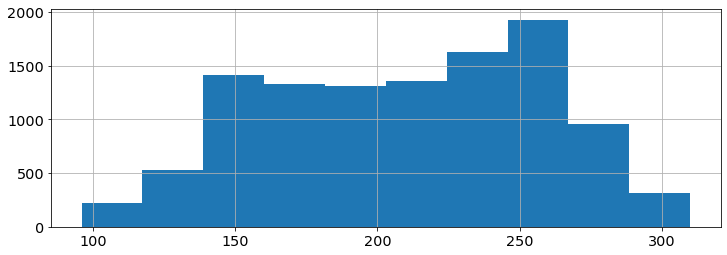

In [23]:
df['custo_produto'].hist()

<AxesSubplot:>

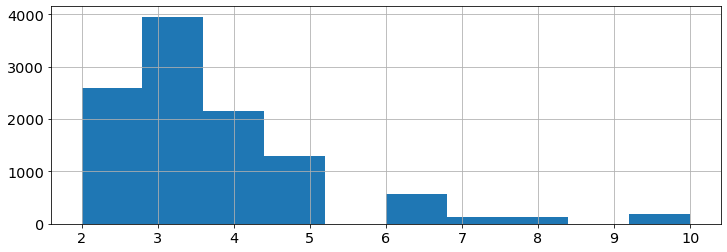

In [24]:
df['compras_anteriores'].hist()

<AxesSubplot:>

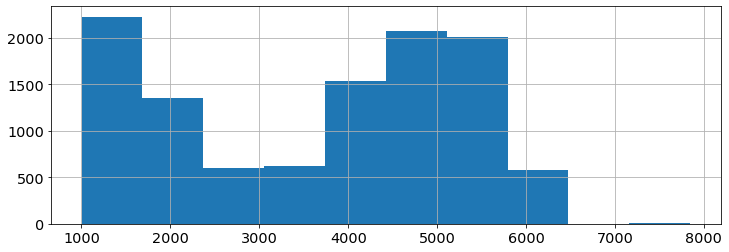

In [25]:
df['peso_gramas'].hist()

## Descriptive Statistical

In [26]:
num_attributes = df.select_dtypes(include=['int64','float64' ])
num_attributes

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1
...,...,...,...,...,...,...,...,...
10995,10996,4,1,232,5,6,1247,0
10996,10997,5,4,242,5,4,1155,0
10997,10998,5,2,223,6,2,1210,0
10998,10999,2,5,155,5,6,1639,0


> ### Numerical Attributes

In [27]:
# Tendência centra: como os dados estão :

# Média
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T

# Mediana
ct2= pd.DataFrame(num_attributes.apply(np.median)).T

In [28]:
# Dispersão: std, min, max, range, skew(assimetria), kurtosis(calda longa)

d1 = pd.DataFrame(num_attributes.apply(np.std)).T

d2 = pd.DataFrame(num_attributes.apply(np.min)).T

d3 = pd.DataFrame(num_attributes.apply(np.max)).T

d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

In [29]:
# concat

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,ID,1.00,11000.00,10999.00,5500.50,5500.50,3175.43,0.00,-1.20
1,numero_chamadas_cliente,2.00,7.00,5.00,4.05,4.00,1.14,0.39,-0.31
2,avaliacao_cliente,1.00,5.00,4.00,2.99,3.00,1.41,0.00,-1.30
3,custo_produto,96.00,310.00,214.00,210.20,214.00,48.06,-0.16,-0.97
4,compras_anteriores,2.00,10.00,8.00,3.57,3.00,1.52,1.68,4.01
5,desconto,1.00,65.00,64.00,13.37,7.00,16.20,1.80,2.00
6,peso_gramas,1001.00,7846.00,6845.00,3633.84,4149.00,1635.33,-0.25,-1.45
7,entregue_no_prazo,0.00,1.00,1.00,0.60,1.00,0.49,-0.39,-1.85


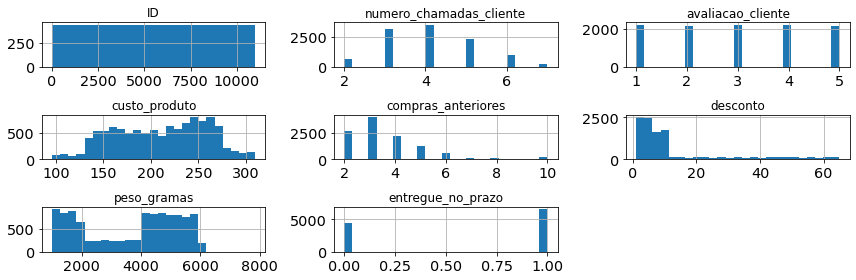

In [30]:
num_attributes.hist(bins=25);
plt.tight_layout()

### Explorando as Variáveis Categóricas

In [31]:
# Resumo das variáveis categóricas
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


> **Análise**:

* Para a variável corredor_armazem **F** é a classe dominante.
* Para a variável de modo de envio **Navio** é a classe dominante.
* Para a variável de prioridade do produto **baixa** é a classe dominante.
* Para a variável de gênero, **F(Feminino)** é a classe dominante.
* Todos os valores únicos para cada categoria estão em torno de **2-5 valores únicos**

In [32]:
# Listando o total por categoria de cada variável categórica
for col in cats:
    print(f'''Total de Registros Por Categoria da Variável {col}:''')
    print(df[col].value_counts())
    print()

Total de Registros Por Categoria da Variável corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total de Registros Por Categoria da Variável modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total de Registros Por Categoria da Variável prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total de Registros Por Categoria da Variável genero:
F    5546
M    5454
Name: genero, dtype: int64



## Descriptive Statistical

In [33]:
cat_attributes = df.select_dtypes(exclude=['int64','float64', 'datetime64[ns]'])
cat_attributes

,corredor_armazem,modo_envio,prioridade_produto,genero
0,D,Aviao,baixa,F
1,F,Aviao,baixa,M
2,A,Aviao,baixa,M
3,B,Aviao,media,M
4,C,Aviao,media,F
...,...,...,...,...
10995,B,Navio,media,F
10996,C,Navio,baixa,F
10997,F,Navio,media,M
10998,D,Navio,baixa,F


> ### Categorical Attributes

In [34]:
# Tipo unicos das variaveis categoricas por coluna
cat_attributes.apply(lambda x: x.unique().shape[0])

corredor_armazem      5
modo_envio            3
prioridade_produto    3
genero                2
dtype: int64

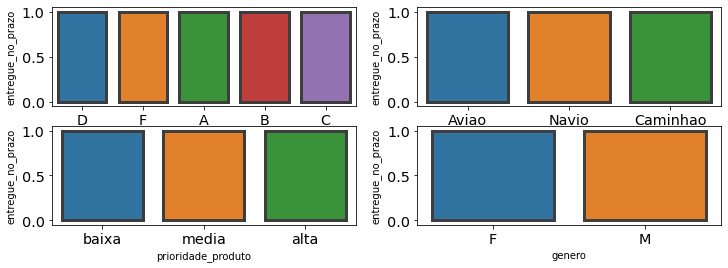

In [35]:
plt.subplot(2,2,1)
sns.boxplot(x='corredor_armazem', y='entregue_no_prazo', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='modo_envio', y='entregue_no_prazo', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='prioridade_produto', y='entregue_no_prazo', data=df);

plt.subplot(2,2,4)
sns.boxplot(x='genero', y='entregue_no_prazo', data=df);

### Análise Variavél Resposta: Target

In [36]:
# Resumo
df['entregue_no_prazo'].value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='count'>

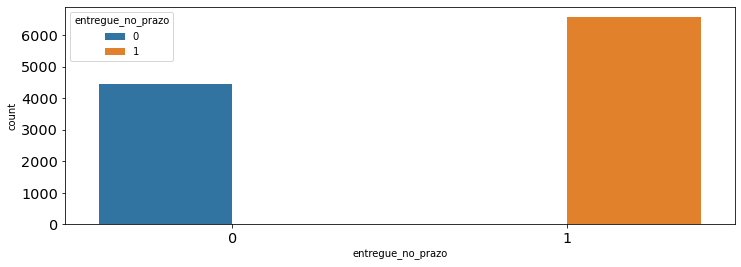

In [37]:
# Count Plot da variável target
# Sendo:
# 0: entrega fora do prazo
# 1: entrega no prazo
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo')

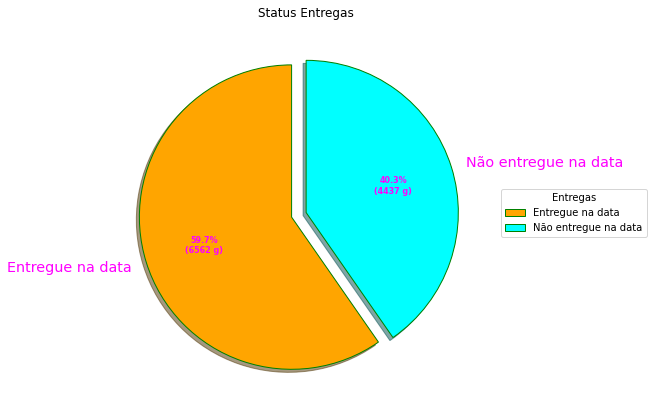

In [38]:
# Check proporção
aux1 = ['Entregue na data', 'Não entregue na data'] 
  
data = [6563, 4437]

explode = (0.1, 0.0) 
colors = ( "orange", "cyan")

wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = aux1, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 

ax.legend(wedges, aux1, 
          title ="Entregas", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Status Entregas") 
plt.show() 
 

> Análise

* A coluna `entregue_no_prazo` (Target) é binária, então não há necessidade de prestar muita atenção à forma da distribuição.

## Univariada

>  ### <font color='blue'> **Nums**

### Análise Univariada - Box Plots

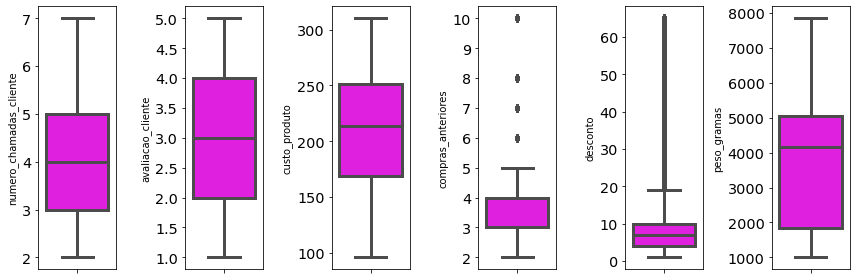

In [39]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

> **Análise**

1. `numer_chamadas_cliente`: não apresenta nenhum grande problema, os dados estão bem distribuidos ao redor da média;

    
2. `avaliacao_cliente`: não apresenta nenhum grande problema, os dados estão bem distribuidos ao redor da média, entretanto, está um pouco mais espaça. Ou seja, tenho mais valores abaixo e acima da mediana;

    
3. `custo_produto`: não apresenta nenhum grande problema, os dados estão bem distribuidos ao redor da média; embora a representação abaixo da mediana (entre 1º e 2º quartil) pareça maior que a parte de cima (2º e 3º quartil). Ou seja, eu tenho um conjunto maior de dados abaixo da mediana entre 1º e 2º quartil;
    
    
4. `compras_anteriores`: esta variavél apresenta valores extremos (outliers), ou seja, valores muito distantes da média e mediana. Com isso podemos observar que a maioria doa cliente realizaram de 3 a 4 compras. Em contrapartida, ouve clientes que realizarm 10 compras (isso foje muito da distribuição média dos dados, ou seja, é uma excessão).
    * Verificar necessidade de análise extra de vido aos outliers
    
    
5. `desconto`: esta variavél apresenta uma grande gama de valores extremos (outliers). Ou seja, uma grande parte dos clientes receberam descontos durante suas compras.
    * Verificar necessidade de análise extra de vido aos outliers
    

6. `peso_gramas`: esta variavél é assimetrica, pois a maioria dos dados se encontra entre  1º e 2º quartil.

### Análise Univariada - Dist Plots

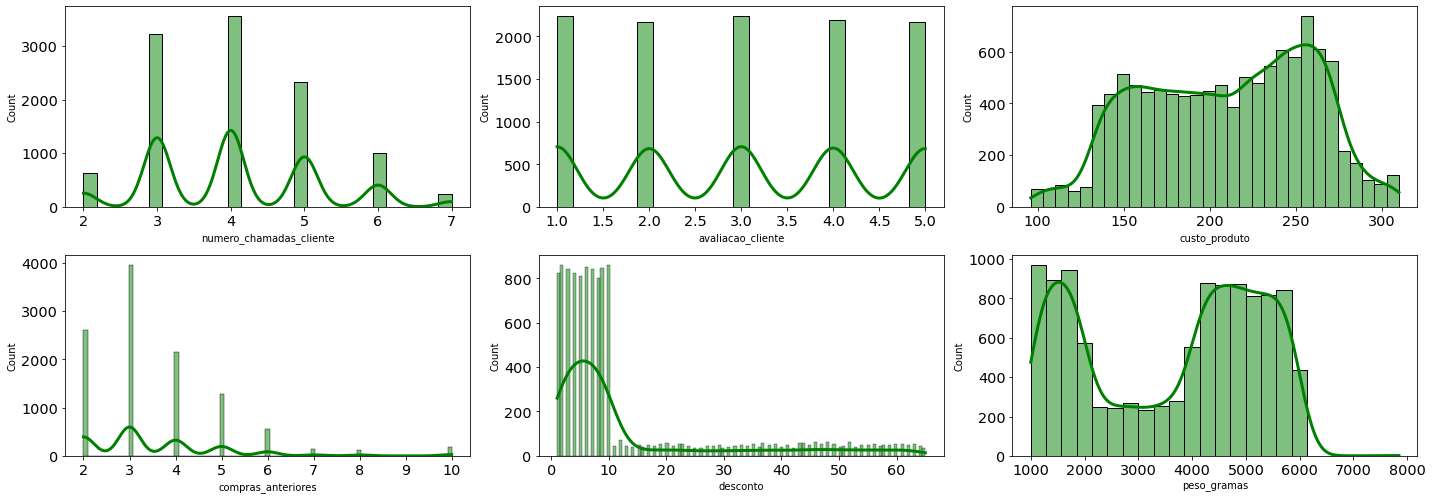

In [40]:
# Histogramas das variaveis numéricas com linha de distribuição
features = nums
plt.figure(figsize = (20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, int(len(nums)/2), i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

> **Análise**

* As duas primeirras variavéis, `numero_chamada_cliente` e `avaliacao_cliente`  parecem seguir uma distribuição uniforme;

* **A terceira variavél `custo_produto` se assemelha mais a normal**;

* As variavés `compras_anteriores` e `desconto` possuem distribuição assimétrica. Ou seja, os dados estão mais próximo de um determinado valor do que da média total da distribuição;

* A última variavél `peso_gramas` possui formato U, ou seja, indica que não é possivél identificar a distribuição desta variavél;

### Análise Univariada - Violin Plots

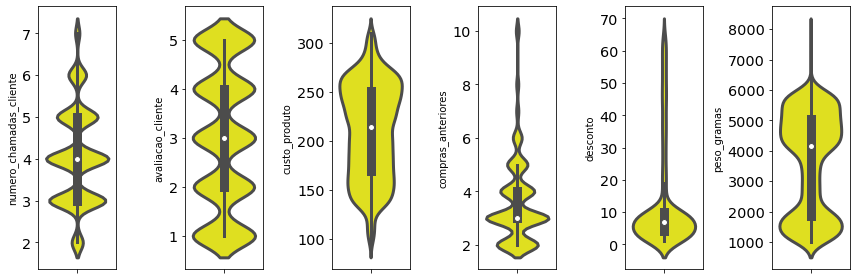

In [41]:
# Plot violino
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = df[nums[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

> **Análise**

* **As colunas `numero_chamadas_cliente` e `avaliacao_cliente` estão distribuídas uniformemente**;

* A coluna `custo_produto` parece estar próxima de uma distribuição normal;

* Como suspeitamo, as colunas `compras_anteriores` e `desconto` estão ligeiramente *inclinadas*, o que significa que existe a possibilidade de precisarmos fazer algo com essas colunas mais tarde.

* Para a coluna `peso_gramas` há incerteza de distribuição porque é em forma de u.

>  ## <font color='blue'> **Cats**

### Análise Univariada - Count Plot (Categorical)

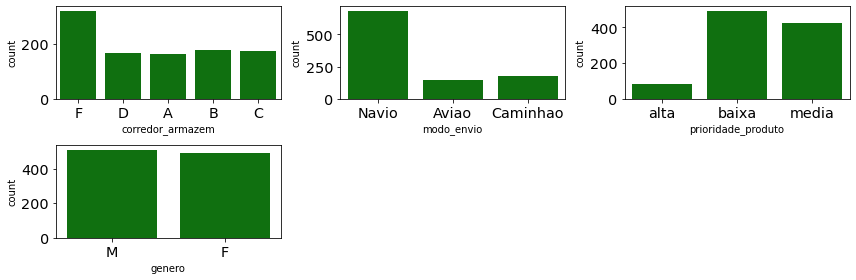

In [42]:
# Gráfico de contagem: ele vai contar os elementos (frequência)
# Usamos um subste de 1000 linhas: df.sample
df_sample = df.sample(1000, random_state = 42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'green', orient = 'v')
    plt.tight_layout()

> **Análise**

* A variavél `corredor_armazem` tem sua maioria de produtos enviados provenientes do corredor F;

* A variavél `modo_envio` tem como elemento mais comum o envio através de Navio e o menos comum Avião;

* A variavél `prioridade_produto` quase tem produtos com prioridade alta de entrega;

* A variavél `genero` tem uma proporção de clientes do sexo Masculino e Feminino é praticamente a mesma;

## Bivariada

### Análise Bivariada - Mapa de Correlação

In [43]:
# Correlação para variavéis numéricas
df[nums].corr()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.00,0.01,0.32,0.18,-0.13,-0.28
avaliacao_cliente,0.01,1.00,0.01,0.01,-0.00,-0.00
custo_produto,0.32,0.01,1.00,0.12,-0.14,-0.13
compras_anteriores,0.18,0.01,0.12,1.00,-0.08,-0.17
desconto,-0.13,-0.00,-0.14,-0.08,1.00,-0.38
peso_gramas,-0.28,-0.00,-0.13,-0.17,-0.38,1.00


In [44]:
# Atribuindo a uma dataframe
corr_df = df[nums].corr()

In [45]:
corr_df

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.00,0.01,0.32,0.18,-0.13,-0.28
avaliacao_cliente,0.01,1.00,0.01,0.01,-0.00,-0.00
custo_produto,0.32,0.01,1.00,0.12,-0.14,-0.13
compras_anteriores,0.18,0.01,0.12,1.00,-0.08,-0.17
desconto,-0.13,-0.00,-0.14,-0.08,1.00,-0.38
peso_gramas,-0.28,-0.00,-0.13,-0.17,-0.38,1.00


<AxesSubplot:>

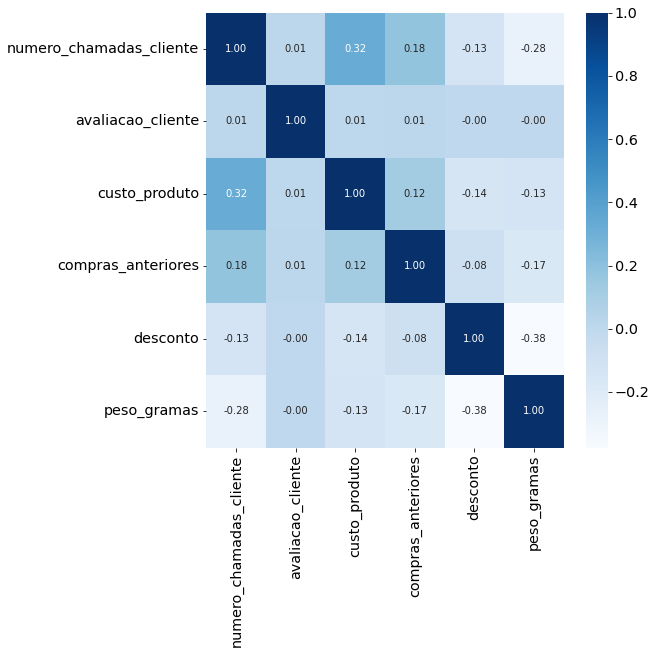

In [46]:
# Mapa de calor
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

> **Análise** do *mapa de correlação*:

* Há uma correlação positiva entre `numero_chamadas_cliente` e `custo_produto`.
* Há uma correlação positiva entre `numero_chamadas_cliente` e `compras_anteriores`.
* Há uma correlação negativa entre `desconto` e `peso_gramas`.
* E há uma correlação fraca entre as demais variáveis.

Obs: Não usamos correlação para variáveis categóricas. Nesse caso usamos associação.

### Análise Bivariada - Pair Plot

<Figure size 1080x1080 with 0 Axes>

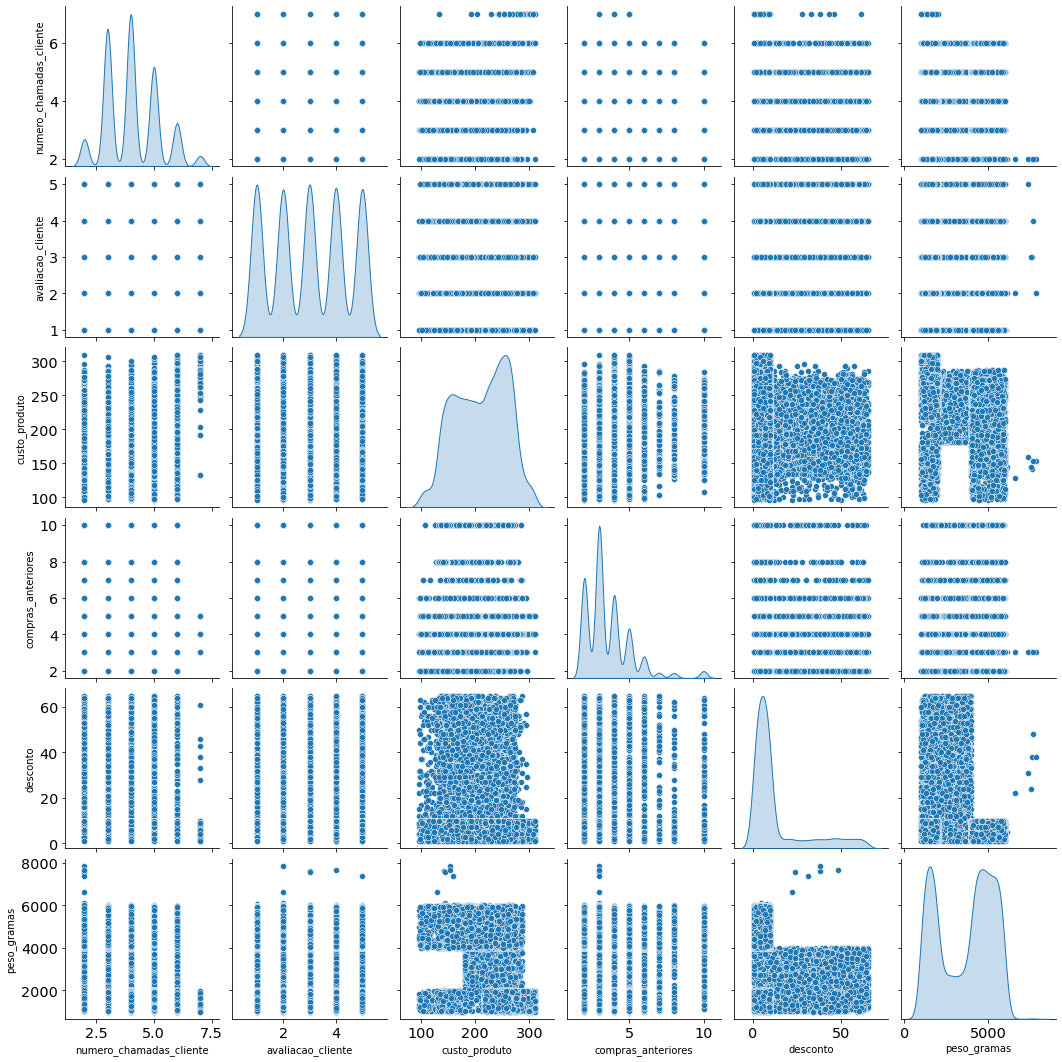

In [47]:
# Compara as variaveis através de um scaterplot( gráfico de dispersão)
# Diagonal:análise univariada (a variavel com ela mesma)
# As outras posições: análise bivariada (uma variavél com a outra)
plt.figure(figsize = (15, 15))
sns.pairplot(df[nums], diag_kind = 'kde')

### Colunas Categóricas x Variável Target

In [48]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

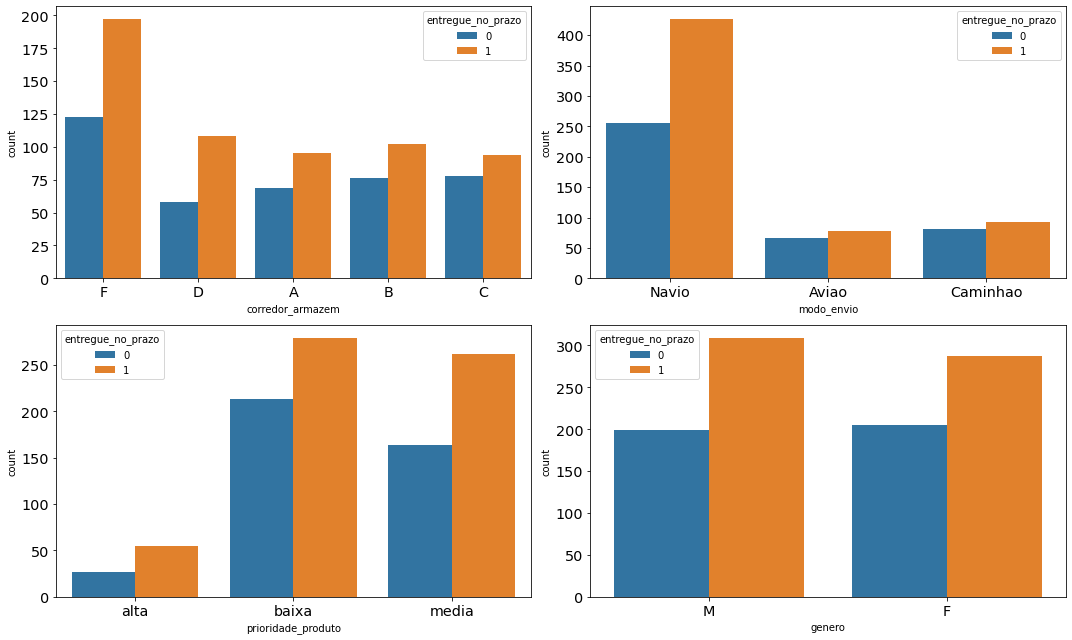

In [49]:
# Correlacionando todas as variavés categóricas com a variavél target (alvo)
plt.figure(figsize = (15, 9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data = df_sample, x = features[i], hue = 'entregue_no_prazo')
    plt.tight_layout()

> **Análise**

* Na variavél `modo_envio` o elemento envio por navio tende a apresentar atraso na entrega;

* Na variavél `prioridade_produto` as categorias baixa e média tendem a apresentar atrasos na entrega;

* Na variavél `corredor_armazem` os produtos do corredor F tendem a apresentar atraso na entrega;

* Na variavél `genero` os produtos comprados por mulheres tem um volume ligeiramente menor de entregas feitas no prazo;

### Correlacionando todas as variavés categóricas (uma a uma ) com a variavél target (alvo)

> corredor_armazem

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='Density'>

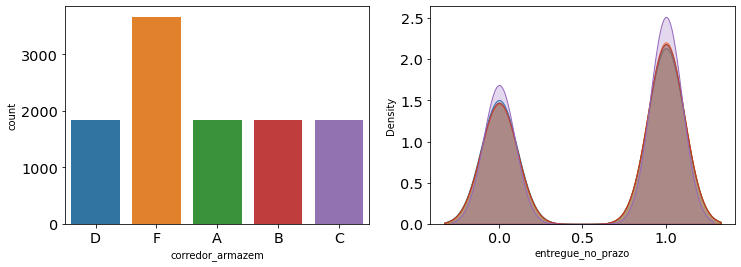

In [50]:
# Vamos pegar as variaveis principais e remover as duplicadas, para sabermos quais os tipos de variaveis originais
df['corredor_armazem'].drop_duplicates()

plt.subplot(1,2,1)
sns.countplot(df['corredor_armazem'])

plt.subplot(1,2,2)
sns.kdeplot(df[df['corredor_armazem'] == 'A']['entregue_no_prazo'], label='A' ,shade=True)
sns.kdeplot(df[df['corredor_armazem'] == 'B']['entregue_no_prazo'], label='B' ,shade=True)
sns.kdeplot(df[df['corredor_armazem'] == 'C']['entregue_no_prazo'], label='C' ,shade=True)
sns.kdeplot(df[df['corredor_armazem'] == 'D']['entregue_no_prazo'], label='D' ,shade=True)
sns.kdeplot(df[df['corredor_armazem'] == 'F']['entregue_no_prazo'], label='F' ,shade=True)

> modo_envio

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='Density'>

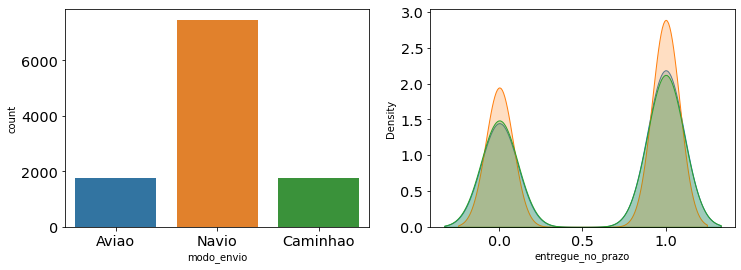

In [51]:
# Vamos pegar as variaveis principais e remover as duplicadas, para sabermos quais os tipos de variaveis originais
df['modo_envio'].drop_duplicates()

plt.subplot(1,2,1)
sns.countplot(df['modo_envio'])

plt.subplot(1,2,2)
sns.kdeplot(df[df['modo_envio'] == 'Aviao']['entregue_no_prazo'], label='Avião' ,shade=True)
sns.kdeplot(df[df['modo_envio'] == 'Navio']['entregue_no_prazo'], label='Navio' ,shade=True)
sns.kdeplot(df[df['modo_envio'] == 'Caminhao']['entregue_no_prazo'], label='Caminhão' ,shade=True)

> prioridade_produto

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='Density'>

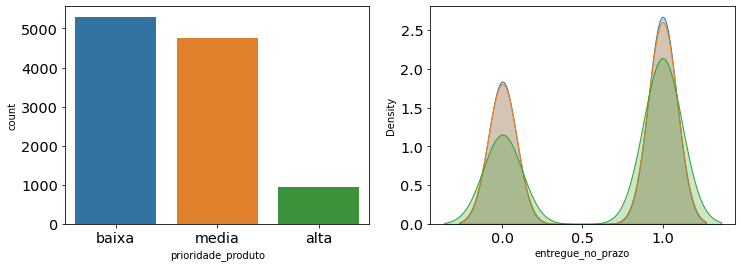

In [52]:
# Vamos pegar as variaveis principais e remover as duplicadas, para sabermos quais os tipos de variaveis originais
df['prioridade_produto'].drop_duplicates()

plt.subplot(1,2,1)
sns.countplot(df['prioridade_produto'])

plt.subplot(1,2,2)
sns.kdeplot(df[df['prioridade_produto'] == 'baixa']['entregue_no_prazo'], label='Baixa' ,shade=True)
sns.kdeplot(df[df['prioridade_produto'] == 'media']['entregue_no_prazo'], label='Média' ,shade=True)
sns.kdeplot(df[df['prioridade_produto'] == 'alta']['entregue_no_prazo'], label='Alta' ,shade=True)

> genero

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='Density'>

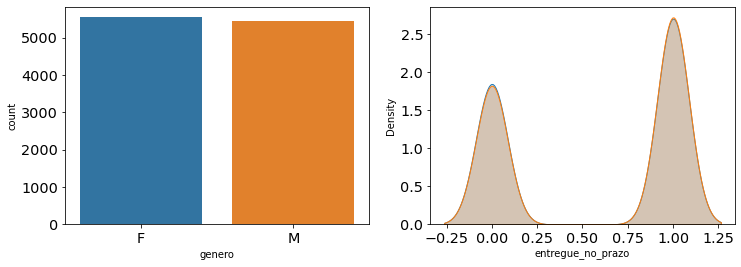

In [53]:
# Vamos pegar as variaveis principais e remover as duplicadas, para sabermos quais os tipos de variaveis originais
df['genero'].drop_duplicates()

plt.subplot(1,2,1)
sns.countplot(df['genero'])

plt.subplot(1,2,2)
sns.kdeplot(df[df['genero'] == 'F']['entregue_no_prazo'], label='Feminino' ,shade=True)
sns.kdeplot(df[df['genero'] == 'M']['entregue_no_prazo'], label='Masculino' ,shade=True)

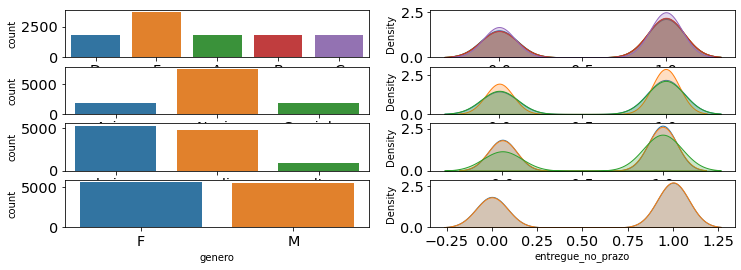

In [54]:
# Todos os gráfico em um painel

# corredor_armazem
plt.subplot(4,2,1)
sns.countplot(df['corredor_armazem'])

plt.subplot(4,2,2)
sns.kdeplot(df[df['corredor_armazem'] == 'A']['entregue_no_prazo'], label='A' ,shade=True)
sns.kdeplot(df[df['corredor_armazem'] == 'B']['entregue_no_prazo'], label='B' ,shade=True)
sns.kdeplot(df[df['corredor_armazem'] == 'C']['entregue_no_prazo'], label='C' ,shade=True)
sns.kdeplot(df[df['corredor_armazem'] == 'D']['entregue_no_prazo'], label='D' ,shade=True)
sns.kdeplot(df[df['corredor_armazem'] == 'F']['entregue_no_prazo'], label='F' ,shade=True)

# modo_envio
plt.subplot(4,2,3)
sns.countplot(df['modo_envio'])

plt.subplot(4,2,4)
sns.kdeplot(df[df['modo_envio'] == 'Aviao']['entregue_no_prazo'], label='Avião' ,shade=True)
sns.kdeplot(df[df['modo_envio'] == 'Navio']['entregue_no_prazo'], label='Navio' ,shade=True)
sns.kdeplot(df[df['modo_envio'] == 'Caminhao']['entregue_no_prazo'], label='Caminhão' ,shade=True)

# prioridade_produto
plt.subplot(4,2,5)
sns.countplot(df['prioridade_produto'])

plt.subplot(4,2,6)
sns.kdeplot(df[df['prioridade_produto'] == 'baixa']['entregue_no_prazo'], label='Baixa' ,shade=True)
sns.kdeplot(df[df['prioridade_produto'] == 'media']['entregue_no_prazo'], label='Média' ,shade=True)
sns.kdeplot(df[df['prioridade_produto'] == 'alta']['entregue_no_prazo'], label='Alta' ,shade=True)

# genero
plt.subplot(4,2,7)
sns.countplot(df['genero'])

plt.subplot(4,2,8)
sns.kdeplot(df[df['genero'] == 'F']['entregue_no_prazo'], label='Feminino' ,shade=True)
sns.kdeplot(df[df['genero'] == 'M']['entregue_no_prazo'], label='Masculino' ,shade=True);


## Conclusão EDA Parte 1:

> Algumas das coisas que encontramos neste conjunto de dados são:

* Os dados parecem válidos e não há defeitos maiores/significativos;

* Existem algumas distribuições que são um pouco *assimétricas*, isso deve ser lembrado se usarmos modelos que exijam a suposição de uma distribuição normal;

* Não detectamos problemas de multicolinearidade;

* Alguns *recursos* parecem completamente não correlacionados;

* Dos recursos categóricos, `modo_envio` , `corredor_armazem` e `importancia_produto` parecem úteis para prever a variável target.

## EDA - Parte 2

### 1- Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes?

> Resposta: Os atrasos nas entregas estão igualmente distribuidos pelos modos de envio, não apresentando valores discrepantes

In [55]:
# lista de colunas dataframe
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [56]:
# Check as classes que temos na variavél modo_envio
# Podemos notar que o o modo_envio = Navio tem um valor muito mais alto que os demais metodos
df['modo_envio'].value_counts()

Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

In [57]:
# Reagrupar os dados: análise ao nivel de linhas
# Grupo 1: agrupamento por entrega_no_prazo (target) e modo_envio somando os totais unicos de id por cada modo de envio
df_group1 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID' : 'nunique'}).reset_index()
df_group1

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [58]:
# Reagrupar os dados: análise ao nivel de linhas
# Grupo 2: agrupamento por entrega_no_prazo (target) + soma dos totais unicos de id por cada modo de entrega
df_group2 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group2

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [59]:
# Group 3: concatenação das duas tabelas df_group1 e df_group2
# ID_x: total de registros de envio da classe 1 da variavel target
# ID_y: total de registros de envio da classe 0 da variavel target
df_group3 = df_group1.merge(df_group2, on = 'entregue_no_prazo')
df_group3

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,4437
1,0,Caminhao,725,4437
2,0,Navio,3004,4437
3,1,Aviao,1069,6563
4,1,Caminhao,1035,6563
5,1,Navio,4459,6563


In [60]:
# Reagrupar os dados: análise ao nivel de linhas
# Grupo 4: agrupamento por modo_envio + soma dos totais unicos de id por cada modo de envio
df_group4 = df.groupby('modo_envio').agg({'ID' : 'nunique'}).reset_index() 
df_group4

,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [61]:
# Group 5 concatenação de df_group1 e df_group4
# ID_x: total ca categoria entrega_prazo para cada classe (0,1)
# ID_y: total ca categoria modo_envio para cada classe (aviao, caminhao, navio)
df_group5 = df_group1.merge(df_group4, on = 'modo_envio')
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [62]:
# Criando uma nova coluna (Percentual(%)) em df_group5 para a proporção
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100

In [63]:
# Renomeando as colunas df_group5
df_group5.columns = ['Status de Entrega no Prazo', 
                     'Modo de Envio', 
                     'Total Por Categoria', 
                     'Total Geral', 
                     'Percentual(%)']
df_group5

,Status de Entrega no Prazo,Modo de Envio,Total Por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.84
1,1,Aviao,1069,1777,60.16
2,0,Caminhao,725,1760,41.19
3,1,Caminhao,1035,1760,58.81
4,0,Navio,3004,7463,40.25
5,1,Navio,4459,7463,59.75


> **Análise**

Como podemos observar na tabela acima, os percentuais das entregas em atraso para todos os módulos são muito próximo, sendo:
* **Entrega fora prazo** (0)
    - Avião: 39.84%
    - Caminhão: 41.19%
    - Navio: 40.25
    
    Mesmo sendo muito próximos os percentuais o modo de envio Caminhão apresenta um valor ligeiramente maior que os demais
    

In [64]:
df_group5.columns

Index(['Status de Entrega no Prazo', 'Modo de Envio', 'Total Por Categoria',
       'Total Geral', 'Percentual(%)'],
      dtype='object')

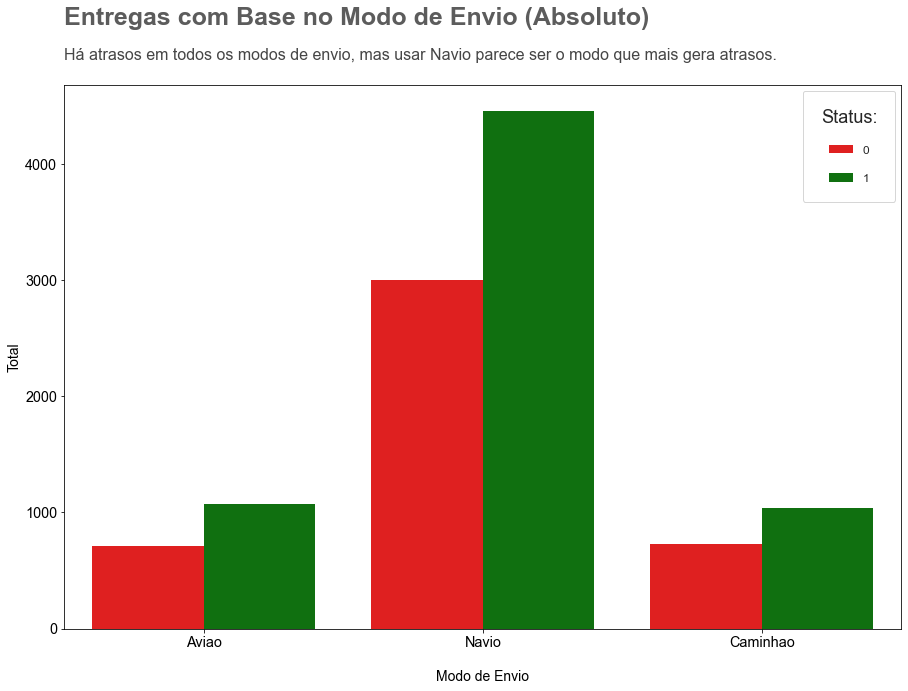

In [65]:
# Gráfico 1 - Análise em Valores Absolutos

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.countplot(data = df, 
                      x = 'modo_envio', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)

# Legenda
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Adicionado Título 
chart.text(x = -0.5, 
           y = 5200, 
           s = "Entregas com Base no Modo de Envio (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Adicionado Sub-Título
chart.text(x = -0.5, 
           y = 4900,
           s = 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
           fontsize = 16, 
           alpha = .85);

In [66]:
df_group5.columns

Index(['Status de Entrega no Prazo', 'Modo de Envio', 'Total Por Categoria',
       'Total Geral', 'Percentual(%)'],
      dtype='object')

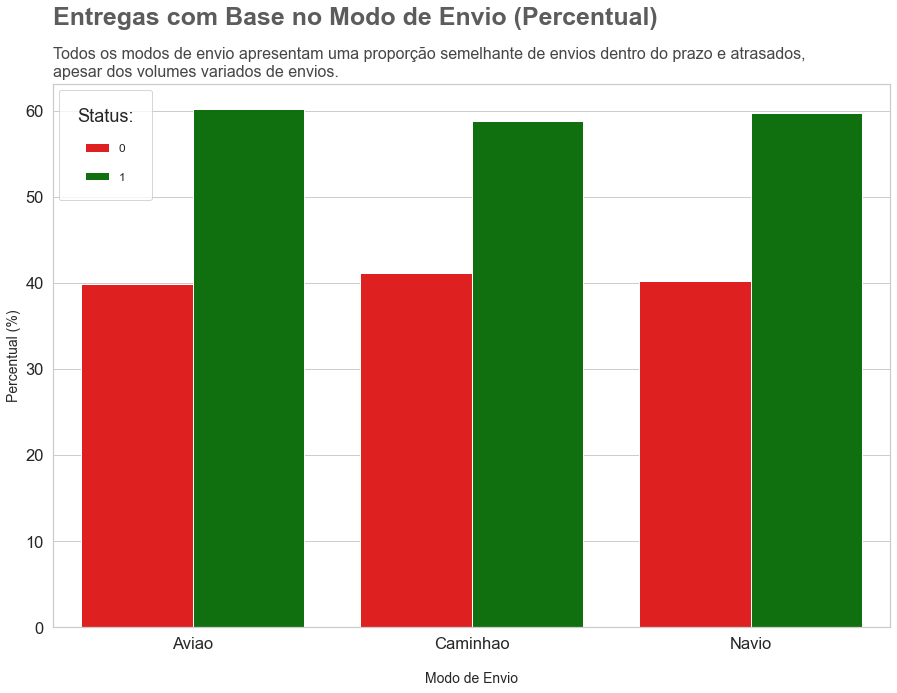

In [67]:
# Gráfico 2 - Análise em Valores Percentuais

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.barplot(x = 'Modo de Envio', 
                    y = 'Percentual(%)', 
                    data = df_group5, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "Entregas com Base no Modo de Envio (Percentual)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, \napesar dos volumes variados de envios.',
           fontsize = 16, 
           alpha = .85);

### 2- Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?

> Resposta: Não há diferença significativa no atraso das entregas quandoo a prioridade é baixa ou média

In [68]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [69]:
# Reagrupar os dados: análise ao nivel de linhas
# Grupo 11: agrupamento por entrega_no_prazo (target) e prioridade_produto + somando os totais unicos de id por cada prioridade_produto
df_group11 = df.groupby(['entregue_no_prazo','prioridade_produto']).agg({'ID' : 'nunique'}).reset_index()
df_group11

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [70]:
# Reagrupar os dados: análise ao nivel de linhas
# Grupo 12: agrupamento por entrega_no_prazo (target) + soma dos totais unicos de id por cada modo de entrega
df_group12 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group12

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [71]:
# Group 3: concatenação das duas tabelas df_group11 e df_group12
# ID_x: total de registros de prioridade da classe 1 da variavel target
# ID_y: total de registros de prioridade da classe 0 da variavel target

df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')
df_group13

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [72]:
# Reagrupar os dados: análise ao nivel de linhas
# Grupo 14: agrupamento por prioridade_produto + soma dos totais unicos de id por cada modo de envio
df_group14 = df.groupby('prioridade_produto').agg({'ID' : 'nunique'}).reset_index() 
df_group14

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [73]:
# Group 15 concatenação de df_group11 e df_group14
# ID_x: total ca categoria entrega_prazo para cada classe (0,1)
# ID_y: total ca categoria modo_envio para cada classe (aviao, caminhao, navio)
df_group15 = df_group11.merge(df_group14, on = 'prioridade_produto')
df_group15

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


In [74]:
# Calculando a percentagem e renomeando as colunas
df_group13['Percentual(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100
df_group13.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group13

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,4437,7.48
1,0,baixa,2158,4437,48.64
2,0,media,1947,4437,43.88
3,1,alta,616,6563,9.39
4,1,baixa,3140,6563,47.84
5,1,media,2807,6563,42.77


> **Análise**:
    
**df_gruop13**: tabela que contém a agregação considerando o total de registros por classes da variavel entrega_prazo (target)

* **Prioridade Alta**:
 - Entrega no prazo: 9.39%
 - Entrega fora do prazo: 7.48%
 
* **Prioridade Média**:
 - Entrega no prazo: 42.77%
 - Entrega fora do prazo: 43.88%
 
* **Prioridade Baixa**:
 - Entrega no prazo: 47.84%
 - Entrega fora do prazo: 48.64%
 
 Sendo assim podemos notar uam diferença de aproximadamente 5% em ambas as classes da variavel target para as prioridades baixa e média

In [75]:
# Calculando a percentagem e renomeando as colunas
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group15

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,948,35.02
1,1,alta,616,948,64.98
2,0,baixa,2158,5298,40.73
3,1,baixa,3140,5298,59.27
4,0,media,1947,4754,40.95
5,1,media,2807,4754,59.05


> **Análise**:
    
**df_gruop15**: tabela que contém a agregação considerando o total de registros por classes da variavel prioridade_produto
    
* **Prioridade Alta**:
 - Entrega no prazo: 64.98%
 - Entrega fora do prazo: 35.02%
 
* **Prioridade Média**:
 - Entrega no prazo: 59.05%
 - Entrega fora do prazo: 40.95%
 
* **Prioridade Baixa**:
 - Entrega no prazo: 59.27%
 - Entrega fora do prazo: 40.73%
 
Já nesta análise não estamos considerando os valores totais para a variavel target, mas sim o total de classe para a variavél prioridade_produto. E aqui podemos notar uma grande diferença em relação ao resultado anterior. O valores para as prioridade média e baixa são quase iguais para ambos as classes da variavel target

In [76]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

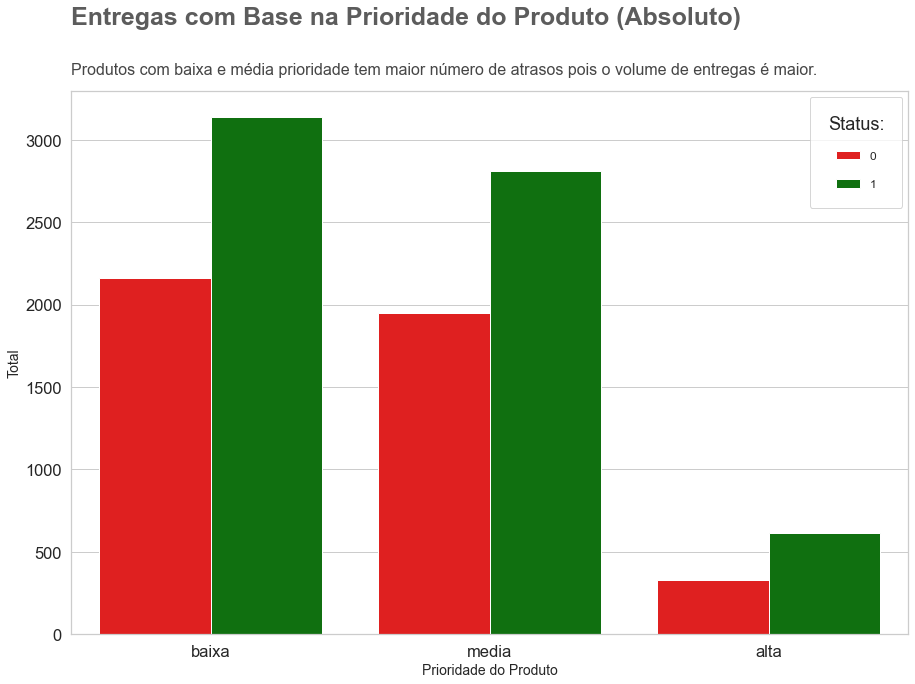

In [77]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'prioridade_produto', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Prioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 3700, 
           s = "Entregas com Base na Prioridade do Produto (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16, 
           alpha = .85);

In [78]:
df_group15.columns

Index(['Status de Entrega no Prazo', 'Prioridade do Produto',
       'Total Por Categoria', 'Total Geral', 'Percentual(%)'],
      dtype='object')

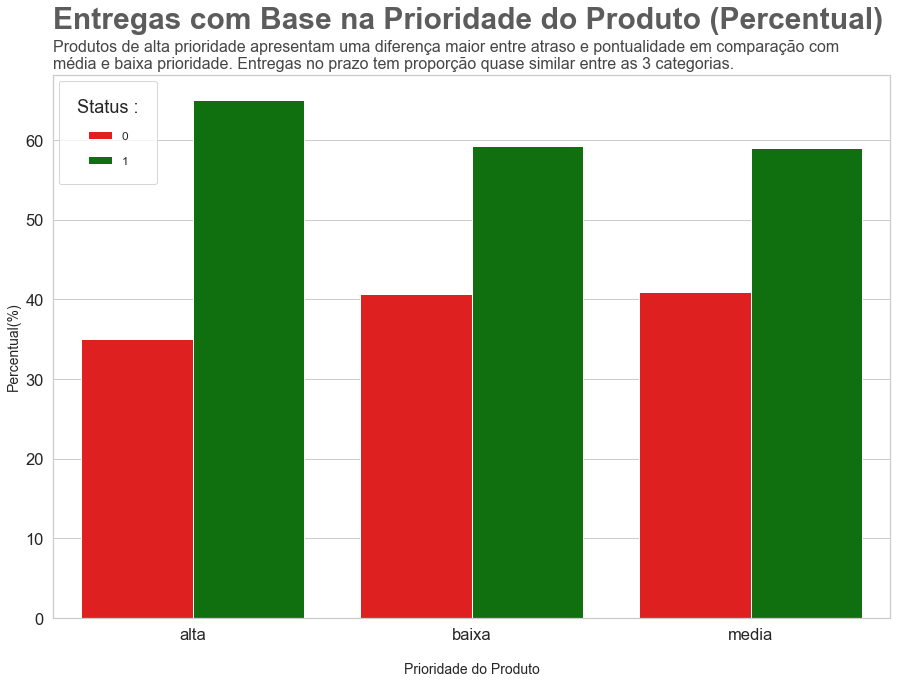

In [79]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Prioridade do Produto', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :')
chart.text(x = -0.5, 
           y = 74, 
           s = "Entregas com Base na Prioridade do Produto (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 69,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com \nmédia e baixa prioridade. Entregas no prazo tem proporção quase similar entre as 3 categorias.',
           fontsize = 16, 
           alpha = .85);


### 3- Quais corredores armazenam produtos com maior proporção de entregas com atraso?

In [80]:
# Check columns
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [81]:
# Reagrupar os dados: análise ao nivel de linhas
# Grupo 21: agrupamento por entrega_no_prazo (target) e corredor_armazem + agregação pela soma dos totais unicos de id por cada corredor_armazem
df_group21 = df.groupby(['entregue_no_prazo','corredor_armazem']).agg({'ID' : 'nunique'}).reset_index()
df_group21

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [82]:
# Reagrupar os dados: análise ao nivel de linhas
# Grupo 22: agrupamento/agregação por entrega_no_prazo (target) + soma dos totais unicos de id por cada corredor_armazem
df_group22 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group22

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [83]:
# Group 23: concatenação das duas tabelas df_group21 e df_group22
# ID_x: total de registros de prioridade da classe 1 da variavel target
# ID_y: total de registros de prioridade da classe 0 da variavel target
df_group23 = df_group21.merge(df_group22, on = 'entregue_no_prazo')
df_group23

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,4437
1,0,B,729,4437
2,0,C,740,4437
3,0,D,738,4437
4,0,F,1472,4437
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [84]:
# Calculand a percentagem e renomeando as colunas
df_group23['Percentual(%)'] = df_group23['ID_x'] / df_group23['ID_y'] * 100
df_group23.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group23

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,4437,17.08
1,0,B,729,4437,16.43
2,0,C,740,4437,16.68
3,0,D,738,4437,16.63
4,0,F,1472,4437,33.18
5,1,A,1075,6563,16.38
6,1,B,1104,6563,16.82
7,1,C,1094,6563,16.67
8,1,D,1096,6563,16.70
9,1,F,2194,6563,33.43


In [85]:
# Reagrupar os dados: análise ao nivel de linhas
# Grupo 24: agrupamento/agregação por corredor_armazem + soma dos totais unicos de id por cada corredor_armazem

df_group24 = df.groupby('corredor_armazem').agg({'ID' : 'nunique'}).reset_index() 
df_group24

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [86]:
# Group 25: concatenação das duas tabelas df_group21 e df_group24
# ID_x: total de registros de prioridade da classe 1 da variavel target
# ID_y: total de registros de prioridade da classe 0 da variavel target

df_group25 = df_group21.merge(df_group24, on = 'corredor_armazem')
df_group25

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [87]:
# Calculando a percentagem e renomeando as colunas
df_group25['Percentual(%)'] = df_group25['ID_x'] / df_group25['ID_y'] * 100
df_group25.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group25

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.35
1,1,A,1075,1833,58.65
2,0,B,729,1833,39.77
3,1,B,1104,1833,60.23
4,0,C,740,1834,40.35
5,1,C,1094,1834,59.65
6,0,D,738,1834,40.24
7,1,D,1096,1834,59.76
8,0,F,1472,3666,40.15
9,1,F,2194,3666,59.85


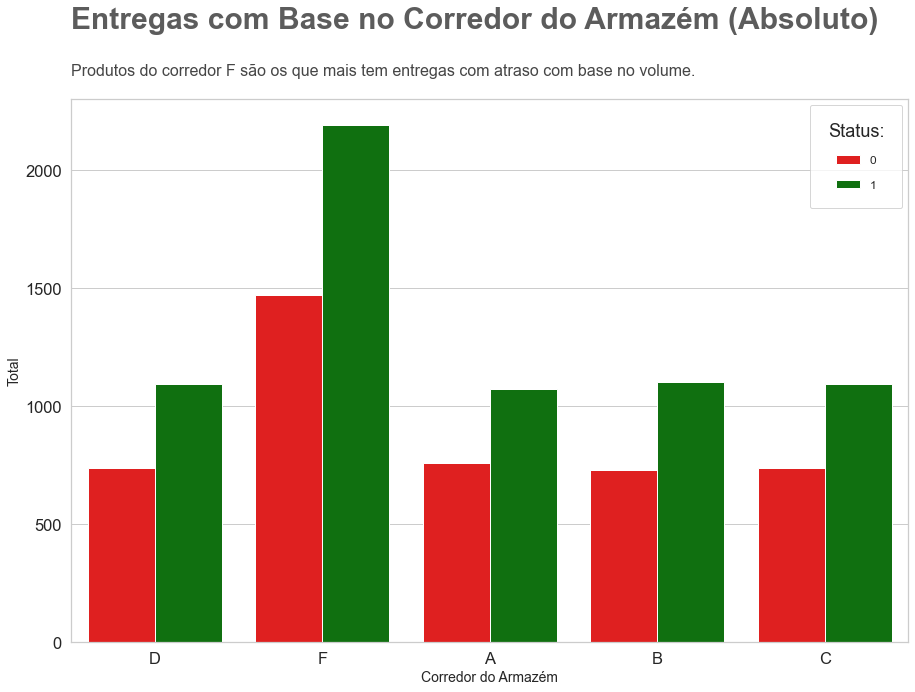

In [88]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'corredor_armazem', 
                      hue = 'entregue_no_prazo', 
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 2600, 
           s = "Entregas com Base no Corredor do Armazém (Absoluto)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 2400,
           s = 'Produtos do corredor F são os que mais tem entregas com atraso com base no volume.',
           fontsize = 16, 
           alpha = .85);

In [89]:
# Check columns
df_group25.columns

Index(['Status de Entrega no Prazo', 'Corredor do Armazem',
       'Total Por Categoria', 'Total Geral', 'Percentual(%)'],
      dtype='object')

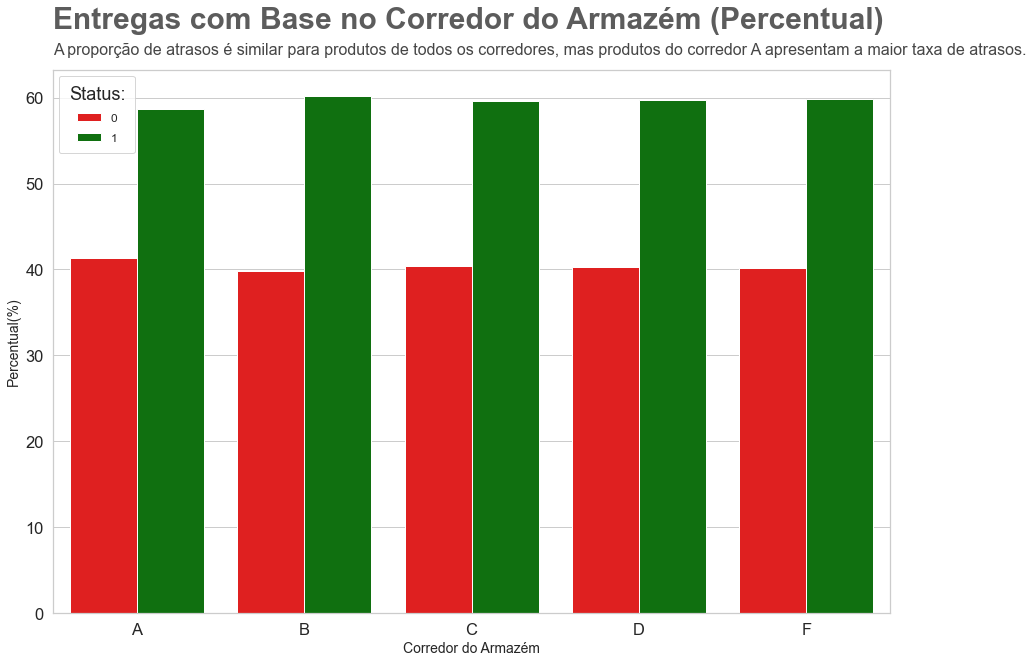

In [90]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Corredor do Armazem', 
                    y = 'Percentual(%)', 
                    data = df_group25, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 68, 
           s = "Entregas com Base no Corredor do Armazém (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 65,
           s = 'A proporção de atrasos é similar para produtos de todos os corredores, mas produtos do corredor A apresentam a maior taxa de atrasos.',
           fontsize = 16, 
           alpha = .85);

> Insigths

Contrariando as primeriras impressões, como podemos observar acima o corredor A apresenta mais produtos em atrasos (proporcionalidade)

### Last question

### Como a densidade da variável que representa desconto influencia o status de entrega dos produtos?

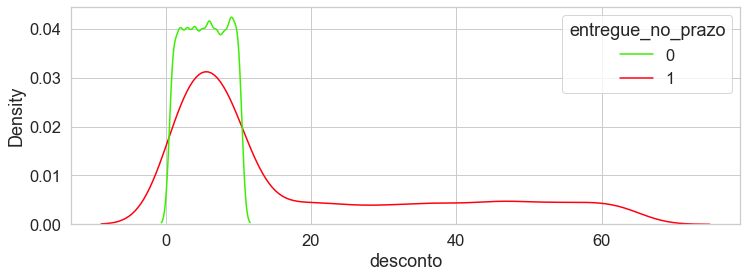

In [91]:
# Resposta com apenas uma linha de código
sns.kdeplot(data = df, x = 'desconto', hue = 'entregue_no_prazo');

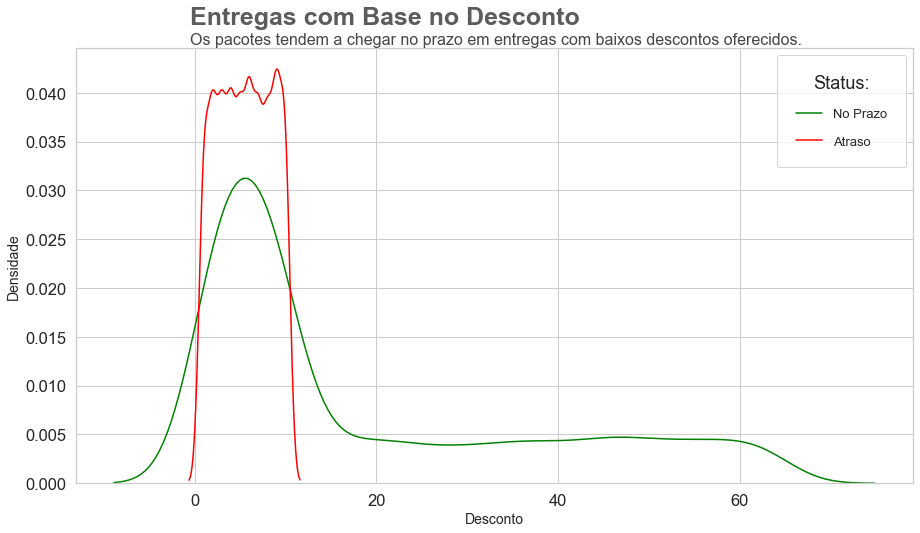

In [92]:
# Resposta com gráfico formatado
plt.figure(figsize = (15,8))
chart = sns.kdeplot(data = df, 
                    x = 'desconto',
                    hue = 'entregue_no_prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('prism')
chart.set_xlabel("Desconto", fontsize = 14)
chart.set_ylabel("Densidade", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 13, 
           title = 'Status:', 
           labels = ['No Prazo', 'Atraso'])
chart.text(x = -0.5, 
           y = 0.047, 
           s = "Entregas com Base no Desconto",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 0.045,
           s = 'Os pacotes tendem a chegar no prazo em entregas com baixos descontos oferecidos.',
           fontsize = 16, 
           alpha = .85);

> **Análise**

Como poemos obervar o pico de ambas as a distribuição (no prazo, atraso) estão entre 0 e 20. 
Ou seja, na menor faixa de desconto eu tenho a maior densidade, tanto de entregas no prazo e entregas fora do prazo.
Portanto a maioria dos valores da variavél estão exatamente próximos dos descontos de 0 a 10 (menor faixa de desconto)
